# 1 - Data Loading

In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = 'D:\\Data Science\\_Diplo\\Mentorias\\Calidad_Serv_Electrico\\BDGD\\2017-12-31\\ENF_6612_2017-12-31_M10_20180820-1410.gdb'

## Cargar Layers de interes

In [3]:
layer_list = ['UCBT','UNTRD','SSDMT','CTMT','PONNOT','UNTRS','SUB','SEGCON']

In [4]:
GDB = {layer: gpd.read_file(data_path, driver='FileGDB', layer= layer) for layer in layer_list}

## Chequear tipos y codificacion

## Generar variable de salida FIC

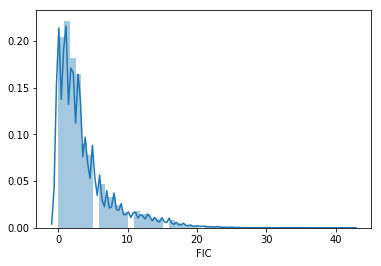

In [21]:
sns.distplot(GDB['UCBT'].FIC)

In [24]:
UNTRD_FIC = GDB['UCBT'].groupby('UNI_TR_D')['FIC'].median()

In [26]:
UNTRD_FIC.head()

UNI_TR_D
              0.0
101415715    15.0
102321736     2.0
103455355    12.0
105138826    10.0
Name: FIC, dtype: float64

## Analisar Variable de salida

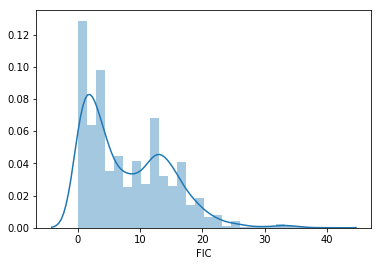

In [27]:
sns.distplot(UNTRD_FIC)

## Exportar Exit Point

In [28]:
import pickle

In [29]:
outfile = open('./data/1_GDB_Layers.pkl','wb')
pickle.dump(GDB, outfile)
outfile.close()

In [43]:
outfile = open('./data/1_OUTFT_UNTRD_FIC.pkl','wb')
pickle.dump(UNTRD_FIC, outfile)
outfile.close()

In [30]:
# Check
infile = open('./data/1_GDB_Layers.pkl','rb')
new_dict = pickle.load(infile)
infile.close()